In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('DATA\Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#checking the parameters which influence the sale price
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

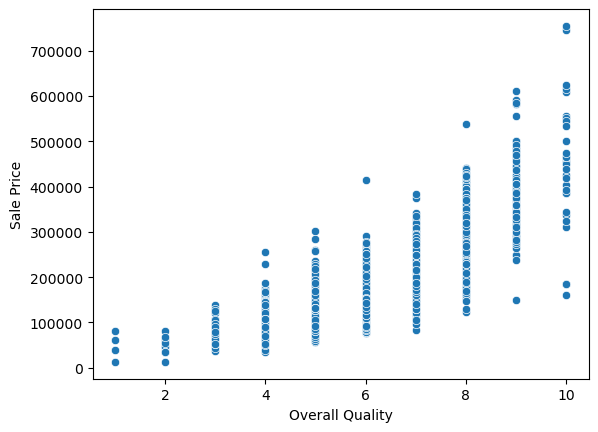

In [4]:
#Since Overall Qualioty and Gr Liv Area have greatest correlation, we will consider them as the basis
sns.scatterplot(data=df,x='Overall Qual',y='SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.savefig('figures\Quality vs Sale Price.jpg')

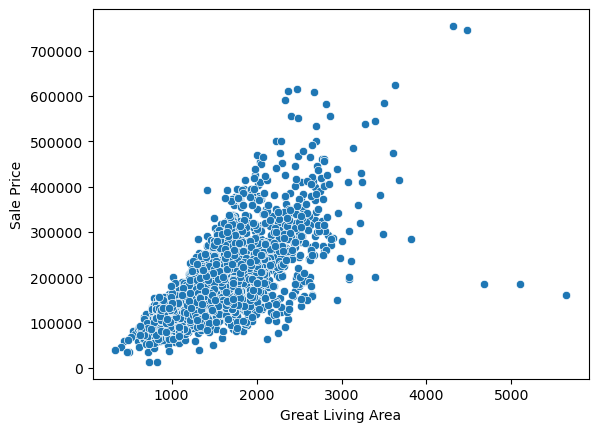

In [5]:
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice')
plt.xlabel('Great Living Area')
plt.ylabel('Sale Price')
plt.savefig('figures\Great Living Area vs Sale Price.jpg')

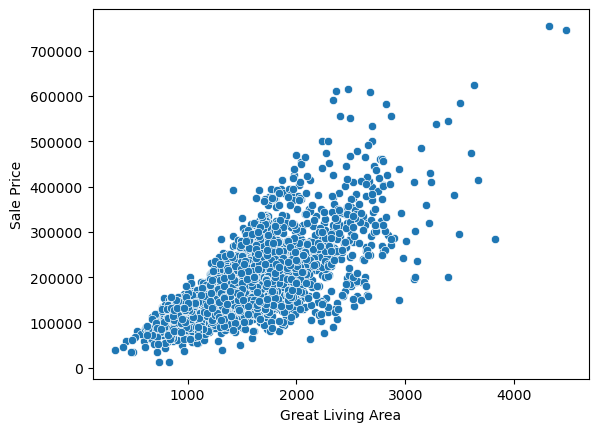

In [6]:
#dealing with the outliers and removing them
drop_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice']<400000)].index
df = df.drop(drop_index,axis=0)

#after removal
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice')
plt.xlabel('Great Living Area')
plt.ylabel('Sale Price')
plt.savefig('figures\Without_Outliers.jpg')


In [7]:
#defing a function to calculate the percentage of missing values in the data and return values greater than 0

def percent_missing(df):
    percent_nan = 100*(df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

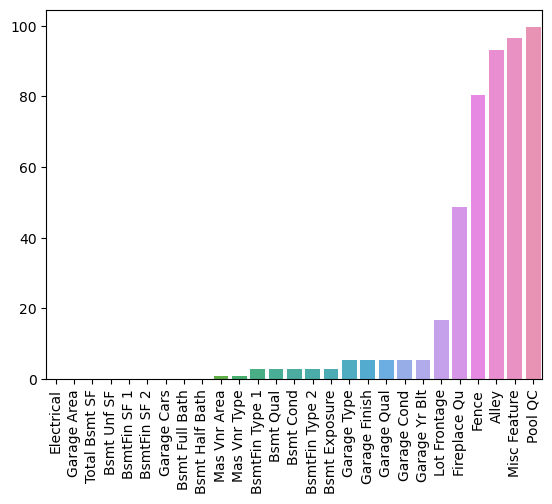

In [8]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.savefig('figures\missing_data_percentages.jpg')

In [9]:
#dealing with features whose percentage missing value is less than 1
features_less_1 = percent_nan[percent_nan<1] 
features_less_1

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [10]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])
percent_nan = percent_missing(df)
features_less_1 = percent_nan[percent_nan<1]
features_less_1

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [11]:
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

percent_nan = percent_missing(df)
features_less_1 = percent_nan[percent_nan<1]
features_less_1


Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

In [12]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

percent_nan = percent_missing(df)
features_less_1 = percent_nan[percent_nan<1]
features_less_1

Series([], dtype: float64)

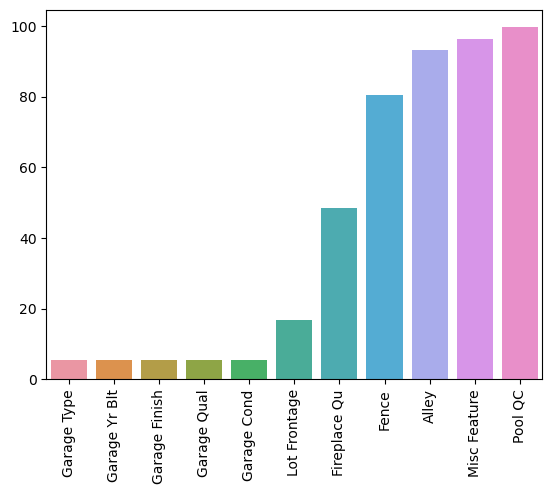

In [13]:
#Now that missing data with percentage mssing values less than 1 is completed, considering on other missing data
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.savefig('figures\missing_data_withhigh_percentage.jpg')

In [14]:
#dealing ith features with  greater than 15 missing values
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [15]:
#dealing with the categorical data
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2925, dtype: int64

In [16]:
df['MS SubClass'] = df['MS SubClass'].apply(str)
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2925, dtype: object

In [17]:
my_numeric_df = df.select_dtypes(exclude='object')
my_object_df = df.select_dtypes(include='object')

#hot encoding
df_object_dummies = pd.get_dummies(my_object_df,drop_first=True) 

final_df = pd.concat([my_numeric_df,df_object_dummies],axis=1)

final_df

,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2926,923276100,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,...,0,0,0,0,1,0,0,0,1,0
2927,923400125,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2928,924100070,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
#we do not PID as it is just another ID
final_df = final_df.drop('PID',axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 284, dtype: float64

   OverallQual: Rates the overall material and finish of the house

           10	Very Excellent
           9	Excellent
           8	Very Good
           7	Good
           6	Above Average
           5	Average
           4	Below Average
           3	Fair
           2	Poor
           1	Very Poor

           
    Most likely a human realtor rated this "Overall Qual" column.It means that any future house prediction model intended to predict a price for will need this "Overall Qual" feature, which implies that every new house on the market that will be priced with the ML model will still require a human person!


In [20]:
#save the final_df as AMES_FINAL_DF.csv under DATA Model for further use